In [1]:
import os
import numpy as np
from bitstring import Bits
import matplotlib.pyplot as plt

In [3]:
DATAPATH = "data"
data = []

print(os.listdir(DATAPATH))

['INL_ideal_SW_ideal_CDAC.csv', 'sine_4.4725M_mismatch_1.csv', 'sine_4.4725M_2048.csv', 'INL_TG_ideal_CDAC.csv', 'out (1).csv', 'INL_mismatch_3_noisy.csv', 'sine_2.33M_2048.csv', 'spectrum_2.31M_4096.csv', 'test.csv', 'INL_enhanced_TG_ideal_CDAC.csv', 'sine_2.33M_512.csv', 'sine_0.31M_mismatch_1.csv', 'spectrum_3.31M_4096.csv', 'INL_pismatch_1_noisy_unbalance.csv', 'sine_4.4725M_2048_liberal.csv', 'spectrum_1.31M_4096.csv', 'INL_mismatch_1_noisy.csv', 'spectrum_0.31M_4096.csv', 'sine_0.2303M_mismatch_1.csv']


In [4]:
with open(os.path.join(DATAPATH, "spectrum_0.31M_4096.csv")) as f:
    data = f.readlines()

In [12]:
spectrum = np.zeros((len(data) - 1, 2))

for i in range(1, len(data)):
    temp = data[i].split(",")
    spectrum[i - 1, 0] = temp[0]
    spectrum[i - 1, 1] = temp[1]

In [13]:
print(spectrum)

[[ 0.000e+00 -4.727e+01]
 [ 2.500e+03 -7.998e+01]
 [ 5.000e+03 -8.821e+01]
 ...
 [ 4.995e+06 -8.817e+01]
 [ 4.998e+06 -8.539e+01]
 [ 5.000e+06 -1.017e+02]]


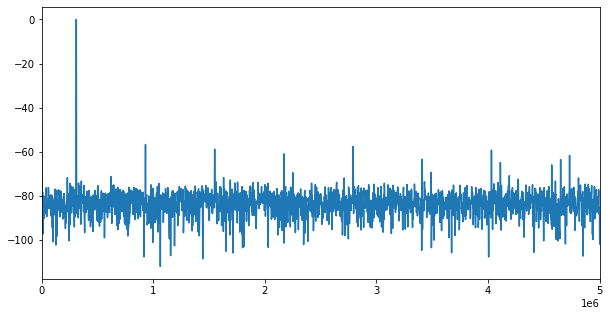

In [47]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(spectrum[:,0], spectrum[:,1])
plt.xlim(0, 5e6)
plt.show()

In [51]:
freq_resolution = 2.5e3

sfdr = max(spectrum[int((0.5e6) / freq_resolution) :, 1])

total_noise_power = 0
# print(int(0.31e6 / freq_resolution))
# print("signal_freq: ", spectrum[124])
for i in range(1, len(spectrum)):
    if(i == int(0.31e6 / freq_resolution)):
        pass
    else:
        amplitude = 10 ** (spectrum[i, 1] / 20)
        total_noise_power += amplitude ** 2

snr = -10 * np.log10(total_noise_power)
enob = (snr - 1.76) / 6.02

print("SFDR:    {:6.2f} dB".format(sfdr))
print("SNDR:    {:6.2f} dB".format(snr))
print("ENOB:    {:6.2f} Bit".format(enob))

SFDR:    -56.66 dB
SNDR:     46.05 dB
ENOB:      7.36 Bit
